In [1]:
#KNN Model:-
#1. CLASSIFICATION
#2.REGRESSION

#-Euclidean distance is considered for finding distance b/w nearest neighbours

In [2]:
import pandas as pd

In [3]:
df=pd.read_csv("C:\\Users\\PIYUSH BHOI\\Desktop\\Sale.csv")

In [4]:
df.shape

(537577, 12)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 537577 entries, 0 to 537576
Data columns (total 12 columns):
User_ID                       537577 non-null int64
Product_ID                    537577 non-null object
Gender                        537577 non-null object
Age                           537577 non-null object
Occupation                    537577 non-null int64
City_Category                 537577 non-null object
Stay_In_Current_City_Years    537577 non-null object
Marital_Status                537577 non-null int64
Product_Category_1            537577 non-null int64
Product_Category_2            370591 non-null float64
Product_Category_3            164278 non-null float64
Purchase                      537577 non-null int64
dtypes: float64(2), int64(5), object(5)
memory usage: 49.2+ MB


In [6]:
df.keys()

Index(['User_ID', 'Product_ID', 'Gender', 'Age', 'Occupation', 'City_Category',
       'Stay_In_Current_City_Years', 'Marital_Status', 'Product_Category_1',
       'Product_Category_2', 'Product_Category_3', 'Purchase'],
      dtype='object')

In [15]:
df.corr(method='pearson')

,User_ID,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
User_ID,1.000000,-0.023024,0.018732,0.003687,0.001471,0.004045,0.005389
Occupation,-0.023024,1.000000,0.024691,-0.008114,-0.000031,0.013452,0.021104
Marital_Status,0.018732,0.024691,1.000000,0.020546,0.015116,0.019452,0.000129
Product_Category_1,0.003687,-0.008114,0.020546,1.000000,0.540423,0.229490,-0.314125
Product_Category_2,0.001471,-0.000031,0.015116,0.540423,1.000000,0.543544,-0.209973
Product_Category_3,0.004045,0.013452,0.019452,0.229490,0.543544,1.000000,-0.022257
Purchase,0.005389,0.021104,0.000129,-0.314125,-0.209973,-0.022257,1.000000


In [16]:
df[["Occupation","Marital_Status"]].corr()

,Occupation,Marital_Status
Occupation,1.000000,0.024691
Marital_Status,0.024691,1.000000


In [17]:
data=df.loc[1:10000,"Gender":"Purchase"]

In [18]:
data.shape

(10000, 10)

In [19]:
#on the basis of Purchase and occupation, we have to purchase whether the gender is 'male' or 'female'

<h1> Count Plot</h1>

In [20]:
import matplotlib.pyplot as plt

In [21]:
import seaborn as sns

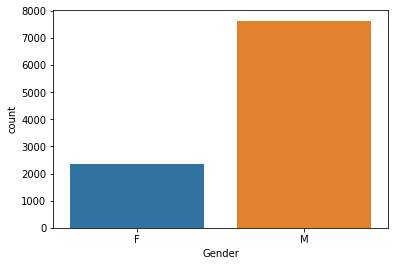

In [23]:
sns.countplot(x="Gender",data=data)

In [24]:
data.loc[:,"Gender"].value_counts()

M    7637
F    2363
Name: Gender, dtype: int64

<h1>Data for KNN Model</h1>

In [25]:
data_knn=data[["Occupation","Purchase","Gender"]]

In [28]:
x=data_knn[["Occupation","Purchase"]].values
y=data_knn[["Gender"]].values

In [29]:
#on the basis of Purchase and occupation, we have to purchase whether the gender is 'male' or 'female'

In [31]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=0)

In [37]:
from sklearn.neighbors import KNeighborsClassifier

In [159]:
knn_clf=KNeighborsClassifier(n_neighbors=3) # number of neighbors

In [160]:
knn_clf.fit(x_train,y_train)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  """Entry point for launching an IPython kernel.


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=3, p=2,
           weights='uniform')

In [161]:
prediction=knn_clf.predict(x_test)

In [162]:
print("With K=5 Accuracy is:",knn_clf.score(x_test,y_test))

With K=5 Accuracy is: 0.7043333333333334


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  import sys
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  import sys
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  import sys
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  import sys
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel

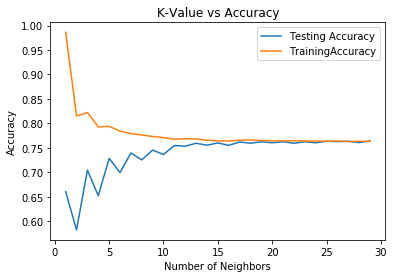

Best Accuracy is 0.764 with k = 29


In [177]:
import numpy as np                     #for data sets - Kaggle & DataWorld
n=np.arange(1,30)                    
train_accuracy=[] 
test_accuracy=[]
for i,k in enumerate(n):
    knn_clf=KNeighborsClassifier(n_neighbors=k)
    knn_clf.fit(x_train,y_train)
    train_accuracy.append(knn_clf.score(x_train,y_train))
    test_accuracy.append(knn_clf.score(x_test,y_test))

    
    #draw plot
plt.plot(n,test_accuracy,label="Testing Accuracy") 
plt.plot(n,train_accuracy,label="TrainingAccuracy")   
plt.legend()
plt.title("K-Value vs Accuracy")
plt.xlabel("Number of Neighbors")
plt.ylabel("Accuracy")
plt.show()
print("Best Accuracy is {} with k = {}".format(np.max(test_accuracy),1+test_accuracy.index(np.max(test_accuracy))))

